In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from pprint import pprint
import sys
from colorama import Style, Fore
import warnings
import time 
import datetime as dt 


warnings.filterwarnings(action = 'ignore')

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [115]:
data = pd.read_csv("C:/Users/whileduck/Desktop/Github/BigContest2023/data/2023빅콘테스트_어드밴스드리그_예술의전당.csv")

##### **콘서트홀이면서 경우로만 데이터 필터링 하기** 

In [3]:
cond = data['place'] == '콘서트홀'

data = data[cond]

In [4]:
data.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N


# **빅 콘테스트 의문 사항**

### **1. price 가 0인 경우는 무엇일까 ? 초대권이 아님에도 불구하고 price 가 0인 경우도 있음**

In [5]:
df = data.copy()

price_cond = df['price'] == 0
price_0_df = df[price_cond]
total_discount_type = price_0_df['discount_type'].unique()
error_discount = ['기획사 할인50%', '기획사 판매20%','기획사 20%', '기획사할인40%','기획사 판매30%','연주자할인30%','기획사판매20%','기획사(특별할인)']
error_discount_cond = df['discount_type'].str.contains('|'.join(error_discount))

가격이0이면서_초대권이_아닌경우 = df[(price_cond) & (error_discount_cond)]

가격이0이면서_초대권이_아닌경우.to_csv('가격이0이면서_초대권이_아닌경우.csv',index = False)

In [6]:
length  = len(가격이0이면서_초대권이_아닌경우)

print('가격이 0이면서 초대권이 아닌 경우의 데이터 개수 : ',length)

가격이0이면서_초대권이_아닌경우.head()

가격이 0이면서 초대권이 아닌 경우의 데이터 개수 :  83


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
20705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1648,...,2,기획사 판매20%,1269,20200815.0,20200816.0,교향곡,콘서트홀,110,15,N
28797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190216,1738,...,0,기획사할인40%,2556,NaN,20190114.0,성악,콘서트홀,120,15,N
40211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1652,...,0,기획사 판매30%,1269,20200815.0,20200816.0,교향곡,콘서트홀,110,15,N
47478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1652,...,0,기획사 판매30%,1269,20200815.0,20200816.0,교향곡,콘서트홀,110,15,N
54771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190216,1738,...,0,기획사할인40%,2556,NaN,20190114.0,성악,콘서트홀,120,15,N


In [7]:
class DataExploratioin:
    '''
    데이터 탐색 시 사용 가능한 Class 

    기존 존재하는 프레임워크들을 이용하여 자주 이용하는 프레임워크들을 활용하여 나만의 분석 툴을 만들려고 함 

    데이터 요약, 결측값 처리 등의 내용이 담겨있는 class 
    '''

    def __init__(self, data):
        self.data = data

    def summarize(self):
        '''
        데이터를 초창기에 요약해주는 method
        '''

        cols = self.data.columns

        size = round(sys.getsizeof(self.data) / 1024 ** 2, 2)

        print(f'data size : {size}MB')

        self.result = pd.DataFrame()

        self.result['Dtype'] = self.data.dtypes.values
        self.result['Count'] = self.data.count().values
        self.result['Nunique'] = self.data.nunique().values
        self.result['Missing value'] = self.data.isna().sum().values
        self.result['Missing %'] = [str(round(
            missing / len(self.data), 2) * 100) + '%' for missing in self.result['Missing value']]
        self.result['Most Freq Value'] = self.data.mode().iloc[0].values

        freq_prop = []

        for i, col in enumerate(cols):

            raw_data = self.data.loc[~self.data[col].isna(), col]
            freq_value = self.result['Most Freq Value'].iloc[i]

            prop = np.mean(
                np.array(raw_data == freq_value)
            )

            prop_str = str(round(np.mean(prop) * 100, 1)) + '%'

            if prop_str == 'nan%':
                freq_prop.append(self.result['Missing %'].iloc[i])
            else:
                freq_prop.append(prop_str)

        self.result['Most Freq Value %'] = freq_prop

        self.result['Min'] = self.data.describe(include='all').T['min'].values
        self.result['Max'] = self.data.describe(include='all').T['max'].values
        self.result['Mean'] = self.data.describe(
            include='all').T['mean'].values
        self.result['Median'] = self.data.describe(
            include='all').T['50%'].values
        
        memory = (self.data.memory_usage(deep = True) // 1024 **2).values[1:] # index 의 usage 는 제외하고 보자 

        
        self.result['MB'] = [str(m) + ' mb' for m in memory]
        self.result = self.result.set_index(cols)

        self.result = self.result.fillna('-')

        display(self.result)
    
    
    def progress_bar(self,iterable, total_blocks = 10):
        
        total_items = len(iterable)
        block_size = total_items // total_blocks
        
        for i, item in enumerate(iterable, start=1):
            if i % block_size == 0 or i == total_items:
                progress = (i / total_items) * 100
                blocks = int(progress / (100 / total_blocks))
                empty_blocks = total_blocks - blocks
                progress_bar = '■' * blocks + '▢' * empty_blocks
                print(f"\rProgress: [{progress_bar}] {progress:.2f}%", end='', flush=True)
            yield item
            time.sleep(0.0000001)
    
    def reduce_size(self):
                
        original_size = round(sys.getsizeof(self.data) / 1024 ** 2,2)
        
        df = self.data.copy()
        
        for col in self.progress_bar(df.columns):
            
            dtp = df[col].dtype
            
            if dtp == 'object':
                df[col] = df[col].astype('category')
            else: # numeric type이면 
                
                if min(df[col]) >= 0 : # 부호가 없다면 unit 으로 변경해줘도 된다.
                    max_value = max(df[col])
                    
                    bits = [8,16,32,64]
                    
                    for bit in bits: # 최소한의 비트로 표현 될 수 있게 dtype 변경 
                        if max_value < 2 ** bit:
                            # 결측치가 있는 경우 astype 으로 변경하지 못하니 결측치를 채워준 후 변경하고 다시 결측치를 채우자 
                            df[col] = df[col].fillna(2 ** bit - 1)
                            df[col] = df[col].astype(f'uint{bit}')
                            df[col] = df[col].replace(2 ** bit - 1, np.NaN)
                            break
                        
                else: # 부호가 있다면 int type 으로 바꿔주자 
                    
                    max_value = max(abs(min(df[col])), max(df[col]))
                    
                    bits = [8,16,32,64]
                    
                    for bit in bits:
                        if max_value < 2 ** bit:
                            df[col] = df[col].fillna(2 ** bit - 1)
                            df[col] = df[col].astype(f'int{bit}')
                            df[col] = df[col].replace(2 ** bit - 1, np.NaN)
                            break
                        
        print('\n')
                        
        after_size = round(sys.getsizeof(df) / 1024 ** 2,2)
        
        # 바꾼 후 결과 보여주기 
        after = DataExploratioin(df)
        after.summarize()
        
        print(f'\n {original_size}MB -> {after_size}MB')
            
        return df
                        
            
                

In [8]:
ep = DataExploratioin(data)

In [9]:
ep.summarize()

data size : 841.91MB


,Dtype,Count,Nunique,Missing value,Missing %,Most Freq Value,Most Freq Value %,Min,Max,Mean,Median,MB
age,float64,484517,8,612451,56.00000000000001%,50.0,23.8%,10.0,80.0,43.018718,40.0,8 mb
gender,object,484867,2,612101,56.00000000000001%,F,65.1%,-,-,-,-,45 mb
membership_type_1,object,484867,3,612101,56.00000000000001%,무료,47.5%,-,-,-,-,58 mb
membership_type_2,object,389737,5,707231,64.0%,무료,49.7%,-,-,-,-,53 mb
membership_type_3,object,140468,4,956500,87.0%,그린,43.6%,-,-,-,-,40 mb
membership_type_4,object,25160,3,1071808,98.0%,그린,77.7%,-,-,-,-,34 mb
membership_type_5,object,1110,1,1095858,100.0%,그린,100.0%,-,-,-,-,33 mb
membership_type_6,float64,0,0,1096968,100.0%,-,100.0%,-,-,-,-,8 mb
tran_date,int64,1096968,1687,0,0.0%,20221112,0.7%,20181101.0,20230703.0,20210083.786885,20211107.0,8 mb
tran_time,int64,1096968,1440,0,0.0%,1401,0.7%,0.0,2359.0,1384.013409,1412.0,8 mb



# **💡insight** 

데이터 사이즈 : 841.91 MB


0. 전체 데이터 데이터 중 빈좌석은 56% 에 육박합니다. 코로나로 인한 대면 거리두기 등에 따라 상이하겠지만 age 와 gender 의 경우가 missing value 인 경우가 빈좌석입니다.

1. 연령대는 bining 된 형태로 존재합니다 10대~80대 까지 있습니다. 현재 테이블에서 50대 연령이 56% 가량 있습니다.

2. 성별은 여성의 비율이 65%, 남성의 비율이 35%입니다

3. 각 멤버십 타입 별 멤버십 가지수의 최대치는 최대 5개인 것으로 보입니다. 멤버십 타입 5, 6 까지 가지고 결제한 고객은 많이 있지 않습니다.

4. 유니크한 좌석의 개수는 2509개입니다.

5. 가격들의 유니크한 개수는 206 개입니다. 가격이 0인 경우가 전체 데이터에서 52.8%나. 됩니다. 좌석이 판매되지 않았거나, 초대권 혹은 무료 입장권등으로 보입니다.

6. 예매 취소 비율은 26.6% 입니다. (2 는 예매 취소하지 않음, 0은 예매 취소하지 않음)

7. 할인을 받은 경우 초대권이 35.4%로 가장 많았습니다. 

8. 공연 장르의 유니크한 개수는 13개입니다. 그 중 교향곡이 48.7% 로 가장 빈도가 높았습니다. 


### **데이터 용량 줄이기**

In [10]:
df = ep.reduce_size()

Progress: [■■■■■■■■■■] 100.00%

data size : 73.71MB


,Dtype,Count,Nunique,Missing value,Missing %,Most Freq Value,Most Freq Value %,Min,Max,Mean,Median,MB
age,float64,484517,8,612451,56.00000000000001%,50.0,23.8%,10.0,80.0,43.018718,40.0,8 mb
gender,category,484867,2,612101,56.00000000000001%,F,65.1%,-,-,-,-,1 mb
membership_type_1,category,484867,3,612101,56.00000000000001%,무료,47.5%,-,-,-,-,1 mb
membership_type_2,category,389737,5,707231,64.0%,무료,49.7%,-,-,-,-,1 mb
membership_type_3,category,140468,4,956500,87.0%,그린,43.6%,-,-,-,-,1 mb
membership_type_4,category,25160,3,1071808,98.0%,그린,77.7%,-,-,-,-,1 mb
membership_type_5,category,1110,1,1095858,100.0%,그린,100.0%,-,-,-,-,1 mb
membership_type_6,float64,0,0,1096968,100.0%,-,100.0%,-,-,-,-,8 mb
tran_date,uint32,1096968,1687,0,0.0%,20221112,0.7%,20181101.0,20230703.0,20210083.786885,20211107.0,4 mb
tran_time,uint16,1096968,1440,0,0.0%,1401,0.7%,0.0,2359.0,1384.013409,1412.0,2 mb



 886.02MB -> 73.71MB


# **💡insight** 

데이터 타입을 변경하는 것만으로도 용량을 90% 가량 줄일 수 있었습니다.

데이터 타입을 변경하여도 데이터의 통계량에는 변화가 없는 모습을 볼 수 있습니다.

데이터의 메모리 사용량을 감소시켜 이후 과정에서 연산속도의 향상을 기대 할 수 있을 것 같습니다.

### **시계열 데이터 처리**

| 컬럼ID | 컬럼명 | 비고 |
|-------|-------|-------|
| tran_date   |예매 거래 일자    | YYYYMMDD   |
| tran_time   |예매 거래 시간  |HHMM   |
| play_date   |공연 시작 날짜  |YYYYMMDD   |
| play_st_time   |공연 시작 시간  |HHMM   |
| pre_open_date    |선예매시작일  |YYYYMMDD   |
| open_date    |예매시작일  |YYYYMMDD   |


시계열 데이터를 데이터 타임 형태로 변경해주겠습니다.

pandas 의 pd.to_datetime 을 이용하면 쉽게 변경 할 수 있습니다.

In [11]:
def change_datetiime(df, cols):
    
    format_type = {
        'tran_date' : 'YYYYMMDD',
        'tran_time' : 'HHMM',
        'play_date' : 'YYYYMMDD',
        'play_st_time' : 'HHMM',
        'pre_open_date' : 'YYYYMMDD',
        'open_date' : 'YYYYMMDD'
    }
    
    data = df.copy()
    
    for col in cols:
        
        if format_type[col] == 'YYYYMMDD':
            format = '%Y%m%d'
            
            data[col] = pd.to_datetime(data[col], format = format)
            
        if format_type[col] == 'HHMM':
            format = '%H%M'

            fill_col = data[col].apply(lambda x: str(x).zfill(4)) # 문자열 형태로 변경 후 4글자인 HHMM 형태로 맞춰줍니다.
                                                            # 현재 데이터에서는 오전 9시 30분인 경우 930 으로 써있습니다.
            data[col] = pd.to_datetime(fill_col, format = format).dt.time
    return data

In [12]:
time_cols = ['tran_date' , 'tran_time','play_date', 'play_st_time','pre_open_date','open_date']

df = change_datetiime(df,  cols = time_cols )

display(df[time_cols])

,tran_date,tran_time,play_date,play_st_time,pre_open_date,open_date
0,2022-01-14,15:12:00,2022-02-04,20:00:00,2022-01-14,2022-01-15
4,2022-02-06,16:15:00,2022-03-02,19:30:00,2022-01-09,2022-01-10
5,2018-11-24,11:45:00,2019-03-23,20:00:00,2018-11-19,2018-11-19
6,2019-10-20,14:59:00,2019-11-09,17:00:00,NaT,2019-10-23
7,2019-06-13,09:54:00,2019-07-23,20:00:00,2019-06-02,2019-06-02
...,...,...,...,...,...,...
1920853,2021-06-18,15:09:00,2021-07-04,15:00:00,2021-06-18,2021-06-20
1920855,2023-05-22,17:29:00,2023-06-13,17:00:00,2023-05-05,2023-05-07
1920856,2020-10-09,16:52:00,2020-10-20,19:30:00,NaT,2020-09-20
1920858,2020-07-26,16:55:00,2020-08-18,19:30:00,2020-07-19,2020-07-20


In [13]:
# 공연 일자 전처리

df['공연연도'] = df['play_date'].dt.year
df['공연월'] = df['play_date'].dt.month
df['공연일'] = df['play_date'].dt.date
df['공연연월'] = df['공연연도'].astype(str) + '-' + df['공연월'].astype(str)
df['공연연월'] = pd.to_datetime(df['공연연월'])

In [14]:
df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,open_date,genre,place,running_time,intermission,member_yn,공연연도,공연월,공연일,공연연월
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,2022-01-14,15:12:00,...,2022-01-15,교향곡,콘서트홀,120,15,Y,2022,2,2022-02-04,2022-02-01
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,2022-02-06,16:15:00,...,2022-01-10,독주,콘서트홀,90,0,Y,2022,3,2022-03-02,2022-03-01
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,2018-11-24,11:45:00,...,2018-11-19,교향곡,콘서트홀,100,15,Y,2019,3,2019-03-23,2019-03-01
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-20,14:59:00,...,2019-10-23,교향곡,콘서트홀,100,15,N,2019,11,2019-11-09,2019-11-01
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-13,09:54:00,...,2019-06-02,교향곡,콘서트홀,120,20,N,2019,7,2019-07-23,2019-07-01


# **좌석 전처리**

In [15]:
df['층'] = df['seat'].map(lambda x: x.split()[0])
df['석'] = df['seat'].map(lambda x: x.split()[1])
df['세부좌석'] = df['seat'].map(lambda x: x.split()[2])

In [16]:
# 전처리 내용 확인 
arr = ['층','석','세부좌석']

for a in arr:
    
    uniq = sorted(df[a].unique())
    
    print(f'{a}의 유니크한 값들')
    
    if len(uniq) <= 5:
        print(uniq)
    else:
        for i in range(0,len(uniq),10):
            print(uniq[i:i+10])

층의 유니크한 값들
['1층', '2층', '3층', '합창석']
석의 유니크한 값들
['A블록10열', 'A블록11열', 'A블록12열', 'A블록13열', 'A블록15열', 'A블록16열', 'A블록17열', 'A블록18열', 'A블록19열', 'A블록1열']
['A블록20열', 'A블록21열', 'A블록22열', 'A블록2열', 'A블록3열', 'A블록4열', 'A블록5열', 'A블록6열', 'A블록7열', 'A블록8열']
['A블록9열', 'BOX1', 'BOX10', 'BOX11', 'BOX12', 'BOX2', 'BOX3', 'BOX4', 'BOX5', 'BOX6']
['BOX7', 'BOX8', 'BOX9', 'B블록10열', 'B블록11열', 'B블록12열', 'B블록13열', 'B블록14열', 'B블록15열', 'B블록16열']
['B블록17열', 'B블록18열', 'B블록19열', 'B블록1열', 'B블록20열', 'B블록21열', 'B블록22열', 'B블록2열', 'B블록3열', 'B블록4열']
['B블록5열', 'B블록6열', 'B블록7열', 'B블록8열', 'B블록9열', 'C블록10열', 'C블록11열', 'C블록12열', 'C블록13열', 'C블록14열']
['C블록15열', 'C블록16열', 'C블록17열', 'C블록18열', 'C블록19열', 'C블록1열', 'C블록20열', 'C블록21열', 'C블록22열', 'C블록2열']
['C블록3열', 'C블록4열', 'C블록5열', 'C블록6열', 'C블록7열', 'C블록8열', 'C블록9열', 'D블록10열', 'D블록11열', 'D블록12열']
['D블록13열', 'D블록14열', 'D블록15열', 'D블록16열', 'D블록17열', 'D블록18열', 'D블록19열', 'D블록1열', 'D블록20열', 'D블록21열']
['D블록22열', 'D블록2열', 'D블록3열', 'D블록4열', 'D블록5열', 'D블록6열', 'D블록7열', 'D블록8열', 'D블록9열', 'E블록10열']

층, 좌석, 세부좌석에 대한 유니크한 값이 잘 처리 된 것을 보입니다.

In [17]:
print(df.shape)
df.head()

(1096968, 31)


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,running_time,intermission,member_yn,공연연도,공연월,공연일,공연연월,층,석,세부좌석
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,2022-01-14,15:12:00,...,120,15,Y,2022,2,2022-02-04,2022-02-01,3층,BOX9,10
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,2022-02-06,16:15:00,...,90,0,Y,2022,3,2022-03-02,2022-03-01,1층,B블록12열,7
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,2018-11-24,11:45:00,...,100,15,Y,2019,3,2019-03-23,2019-03-01,1층,A블록2열,1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-20,14:59:00,...,100,15,N,2019,11,2019-11-09,2019-11-01,3층,E블록4열,8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-13,09:54:00,...,120,20,N,2019,7,2019-07-23,2019-07-01,2층,D블록8열,4


# **좌석 좌표 값 붙이기**

* 예술의 전당에서 2023년에 제공한 좌석표 평면도와 CAD를 이용하여 좌표값들을 추출해놨습니다.

In [18]:
seat_information = pd.read_csv("C:/Users/whileduck/Desktop/Github/BigContest2023/data/콘서트홀_좌석_좌표값.csv", encoding = 'euc-kr')

seat_information

,층,블록,열,넘버,seat,X,Y,Z
0,1층,A블록,1,1,1층 A블록1열 1,14512,5423,60874
1,1층,A블록,1,2,1층 A블록1열 2,14060,5549,60874
2,1층,A블록,1,3,1층 A블록1열 3,13607,5675,60874
3,1층,A블록,1,4,1층 A블록1열 4,13154,5802,60874
4,1층,A블록,1,5,1층 A블록1열 5,12696,5906,60874
...,...,...,...,...,...,...,...,...
2500,2층,BOX6,없음,2,2층 BOX6 2,-14323,5053,65631
2501,2층,BOX6,없음,3,2층 BOX6 3,-15001,5646,66081
2502,2층,BOX6,없음,4,2층 BOX6 4,-14540,6173,66081
2503,2층,BOX6,없음,5,2층 BOX6 5,-15217,6765,66631


In [50]:
test = pd.merge(df,seat_information[['seat','X','Y','Z']])

In [51]:
test['공연일'] = test['공연일'].astype(str)

In [52]:
test['층 + 석'] = test['층'] + test['석']

In [42]:
def min_max(x):
    
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [53]:
hh = test[test['공연일'] == '2022-02-04']

In [54]:
test['X'] = min_max(test['X'])
test['Y'] = min_max(test['Y'])
test['Z'] = min_max(test['Z'])

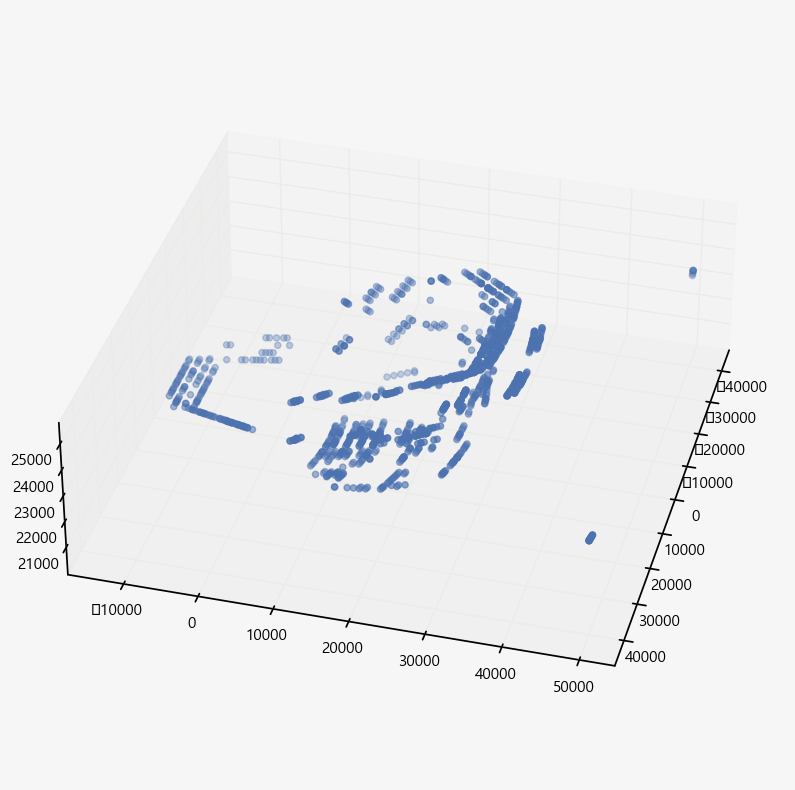

In [76]:
fig,ax = plt.subplots(figsize = (10,10),subplot_kw = {'projection' : '3d'})

ax.scatter3D(data = hh,
            xs = 'X',
            ys = 'Y',
            zs = 'Z'
)

ax.set_box_aspect([3, 3, 1])

ax.view_init(35,15)

In [89]:
hh['price']

0          10000
1520       50000
1578       50000
1610       40000
1702       47000
           ...  
1093986    10000
1094022    10000
1095331    20000
1095586    10000
1095610    10000
Name: price, Length: 1255, dtype: uint32

<AxesSubplot:xlabel='X', ylabel='Y'>

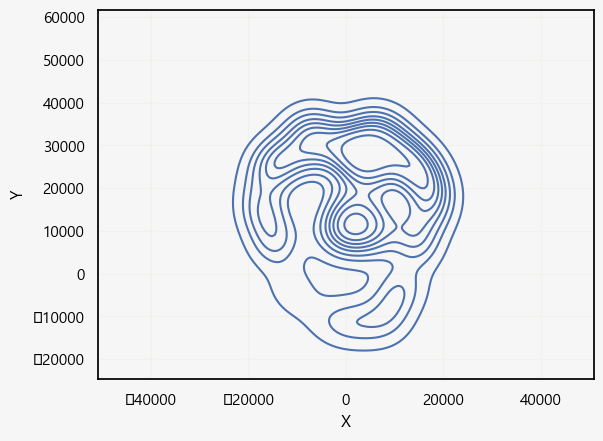

In [105]:
sns.kdeplot(
    data = hh,
    x = 'X',
    y = 'Y'
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1095610
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                1220 non-null   float64       
 1   gender             1220 non-null   category      
 2   membership_type_1  1220 non-null   category      
 3   membership_type_2  1086 non-null   category      
 4   membership_type_3  512 non-null    category      
 5   membership_type_4  159 non-null    category      
 6   membership_type_5  0 non-null      category      
 7   membership_type_6  0 non-null      float64       
 8   tran_date          1255 non-null   datetime64[ns]
 9   tran_time          1255 non-null   object        
 10  play_date          1255 non-null   datetime64[ns]
 11  play_st_time       1255 non-null   object        
 12  seat               1255 non-null   object        
 13  price              1255 non-null   uint32        
 14  ticke

NameError: name 'heatmap_data' is not defined

In [79]:
import plotly.express as px

fig = px.scatter_3d(hh, x='X', y='Y', z='Z', width=1000, height=800, 
                     title='3D Scatter Plot', size_max=5)

fig.update_scenes(aspectmode="manual", aspectratio=dict(x=3, y=3, z=1))
fig.show()

In [56]:
import plotly.express as px



fig = px.scatter_3d(test[test['공연일'] == '2022-02-04'], x='X', y='Y', z='Z', width=1000, height=1000, 
                     title='3D Scatter Plot', size_max=5)
fig.show()

일단여기깔쥐

In [24]:
def time_grouping(index_col, var_col):
    
    grouped = df.groupby([index_col,var_col]).agg({'age':'count'}).reset_index()

    grouped['year'] = grouped[var_col].dt.year

    grouped['month'] = grouped[var_col].dt.month

    grouped['year_month'] = grouped['year'].astype(str) + '-' + grouped['month'].astype(str).str.zfill(2)
    grouped['year_month'] = pd.to_datetime(grouped['year_month'], format = '%Y-%m')

    year_month = grouped.groupby([index_col,'year_month']).agg({'age':'mean'}).reset_index()    
    
    return grouped,year_month

In [25]:
grouped, year_month = time_grouping('place','play_date')

Text(0.5, 0.98, '공연장 별 2019 - 2023 평균 관람객 수')

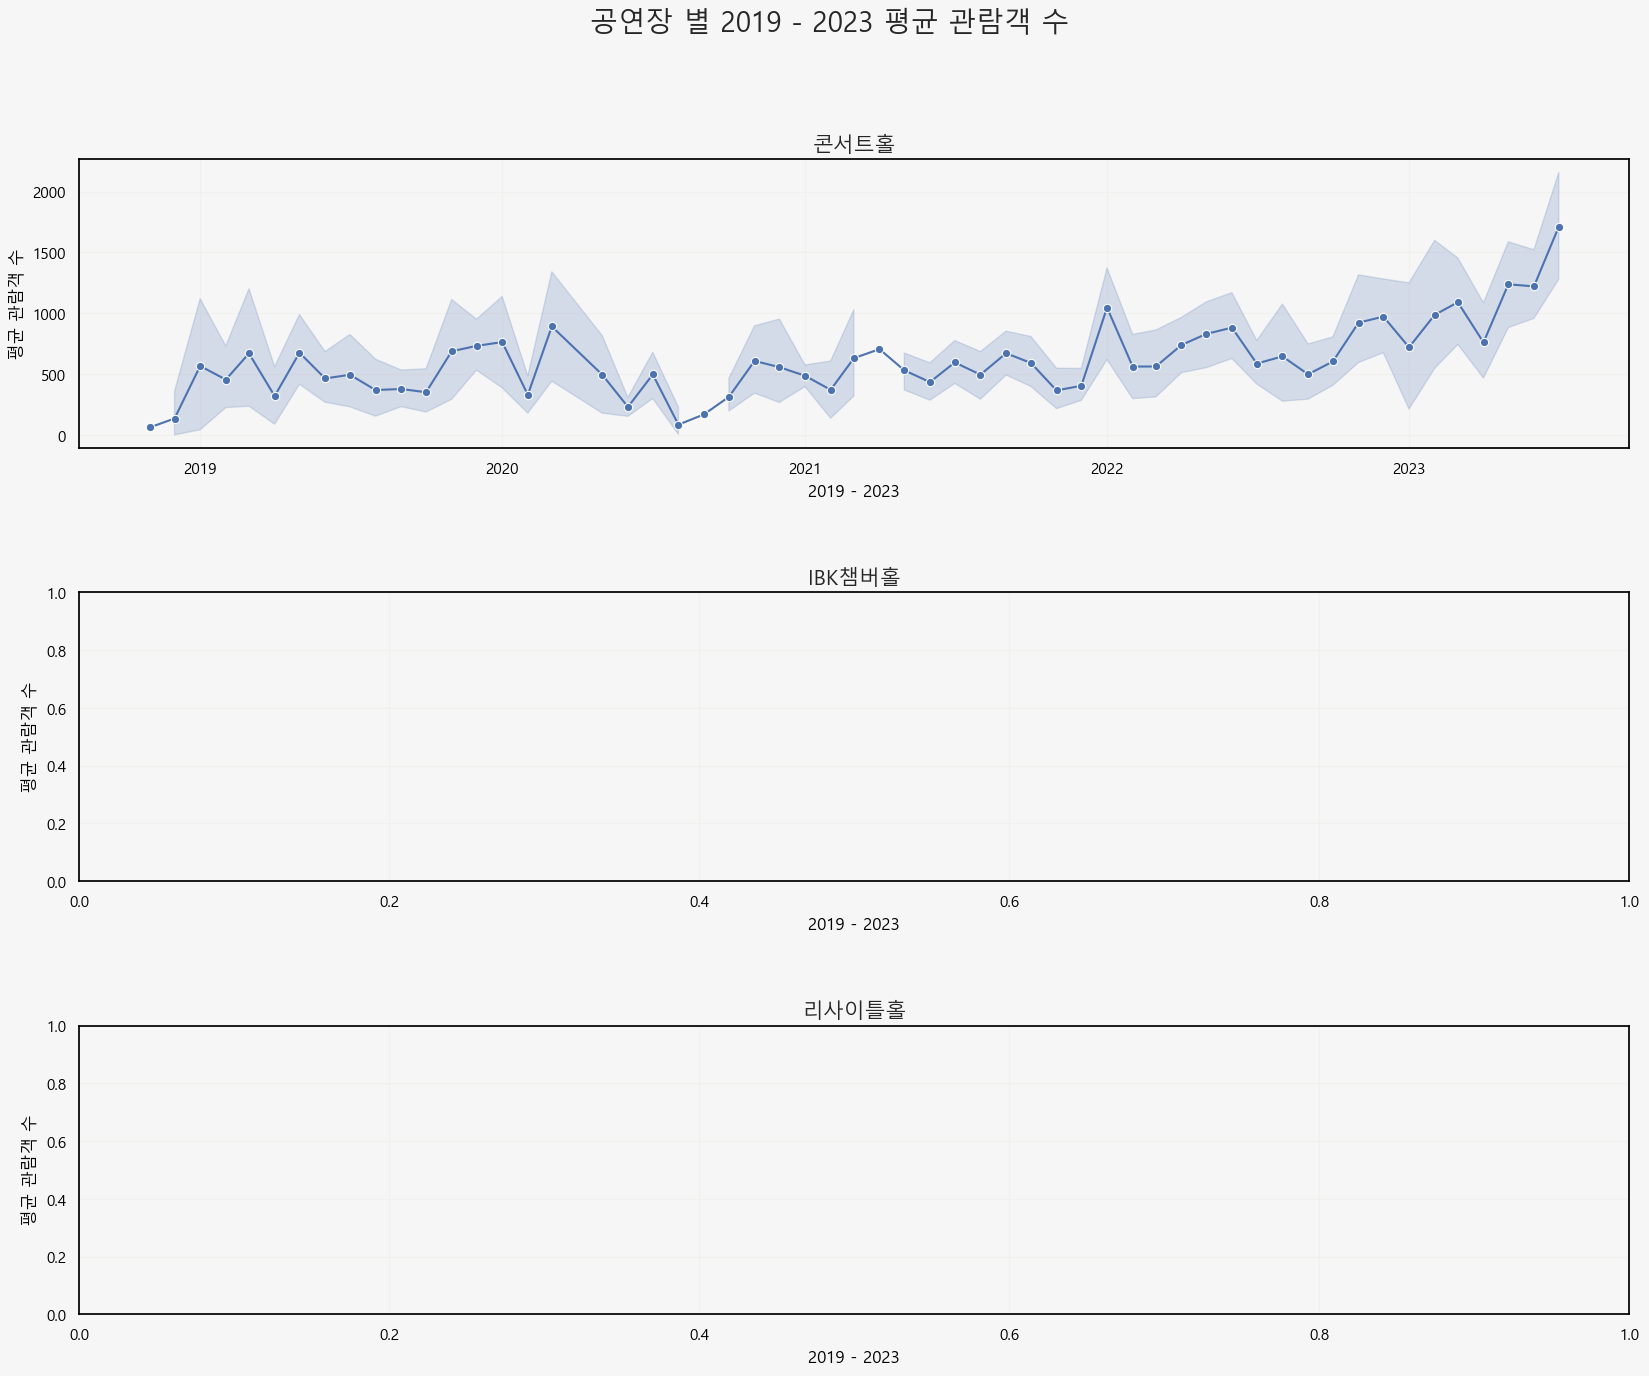

In [26]:
place = ['콘서트홀','IBK챔버홀','리사이틀홀']

fig,ax = plt.subplots(
    nrows = 3, figsize = (20,15)
)

fig.subplots_adjust(hspace = 0.5)

for i ,var in enumerate(place):
    
    cond = grouped['place'] == var
    
    sns.lineplot(
        data = grouped[cond],
        x = 'year_month',
        y = 'age',
        marker = 'o',
        ax = ax[i]
    )
    
    ax[i].set_title(var, fontsize = 15)
    ax[i].set_ylabel('평균 관람객 수')
    ax[i].set_xlabel('2019 - 2023')
    
fig.suptitle('공연장 별 2019 - 2023 평균 관람객 수', fontsize = 20)

<aside>
💡 Insight

 코로나로 인해 규제가 있던 2020 ~ 2022 전까지 평균 관람객 수는 콘서트 홀의 경우에는 코로나 시기와 포스트 코로나 시기의 차이가 극명하게 드러납니다

 IBK 챔버홀과 리사이틀홀의 경우는 코로나 시기와 포스트 코로나 시기의 차이가 보이지 않는듯합니다

</aside>

Text(0.5, 0.98, '장르 별 2019 - 2023 평균 관람객 수')

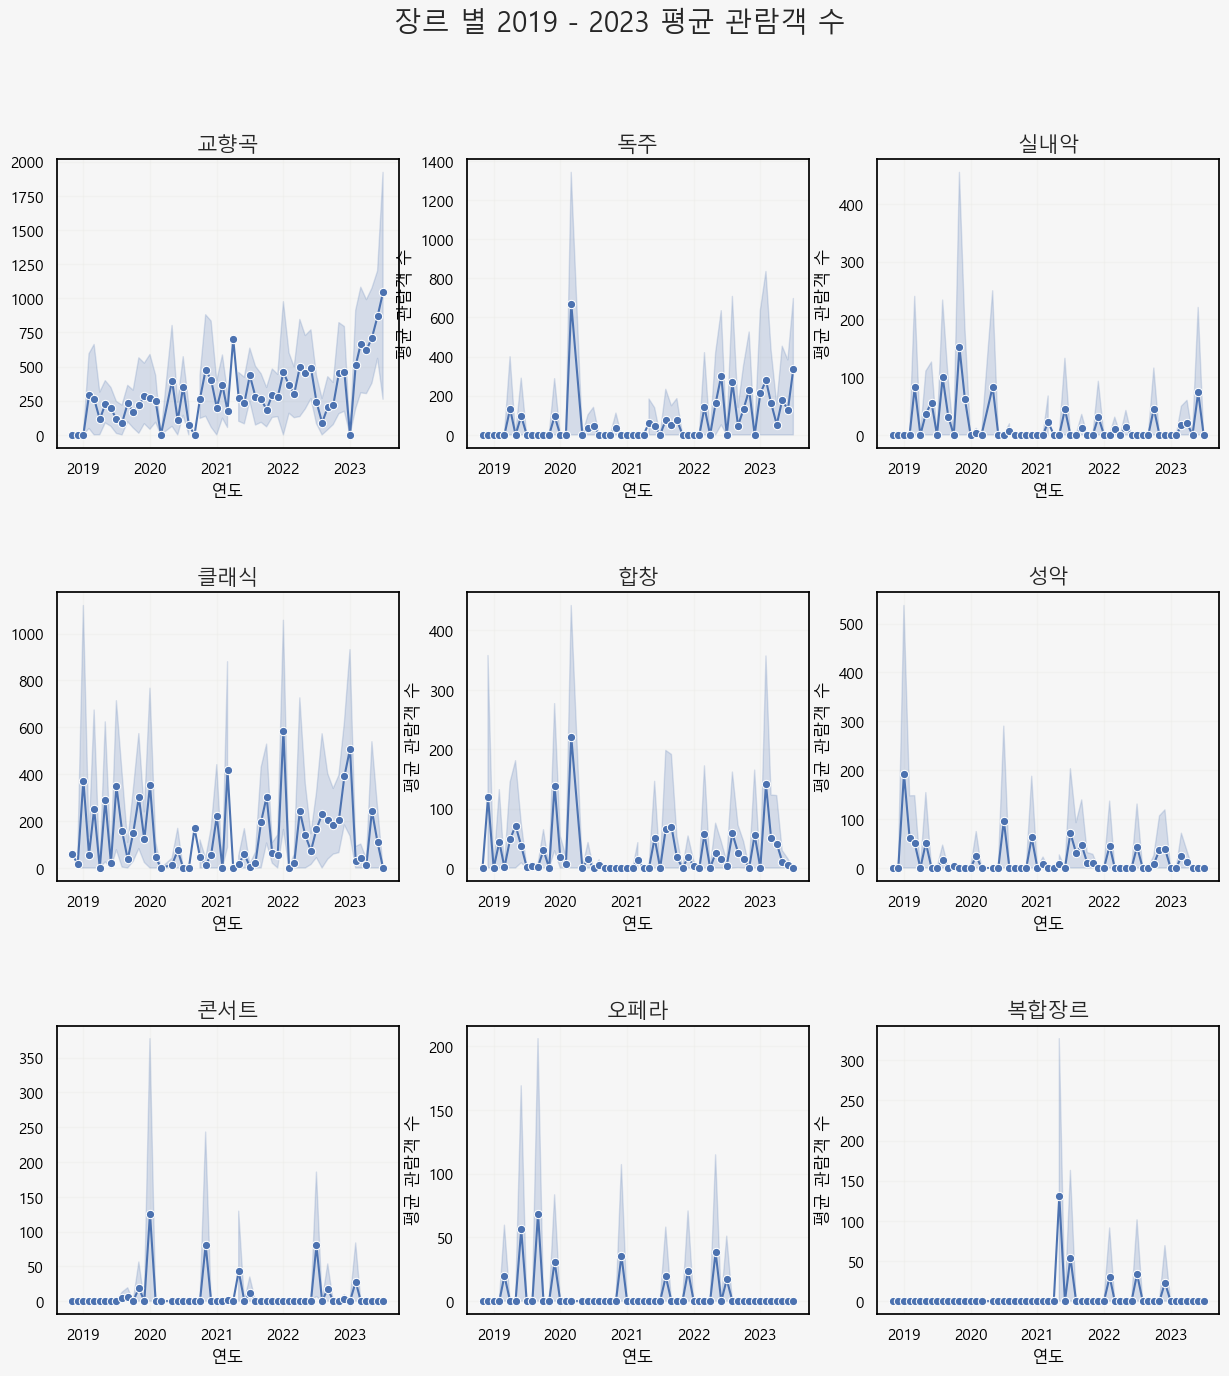

In [27]:
grouped, year_month = time_grouping('genre','play_date')

genre = ['교향곡','독주','실내악','클래식','합창','성악','콘서트','오페라','복합장르']

fig,ax = plt.subplots(
    nrows = 3,ncols = 3, figsize = (15,15)
)

ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)

for i ,var in enumerate(genre):
    
    cond = grouped['genre'] == var
    
    sns.lineplot(
        data = grouped[cond],
        x = 'year_month',
        y = 'age',
        marker = 'o',
        ax = ax[i]
    )
    ax[i].set_title(var, fontsize = 15)
    ax[i].set_xlabel('연도')
    
    if i % 3:
        ax[i].set_ylabel('평균 관람객 수')
    else:
        ax[i].set_ylabel('')
    
fig.suptitle('장르 별 2019 - 2023 평균 관람객 수', fontsize = 20)

<aside>
💡 Insight

 장르별로 교향곡과 독주의 경우는 코로나 시기때와 포스트 코로나 시기 때를 기준으로 차이가 나는 것으로 보입니다.

 타 장르들의 경우에는 유의미한 차이가 보이지 않습니다.

</aside>

# **좌석을 어떻게 그룹핑 할 것인가에 대한 아이디어 추출**

In [28]:
# 고려해야 할 장소

print(
    df['place'].unique()
)

['콘서트홀']
Categories (1, object): ['콘서트홀']


* 콘서트홀들의 빈도수

Text(0.5, 1.0, '콘서트홀 빈도')

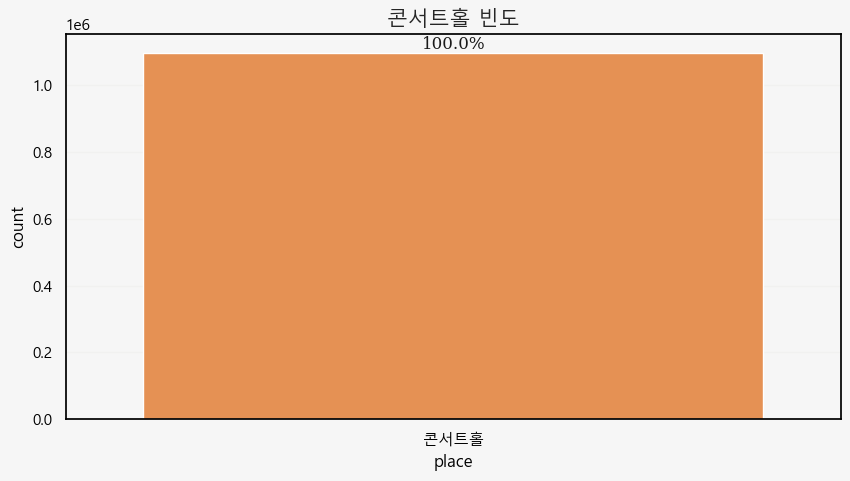

In [29]:
fig,ax = plt.subplots(figsize  = (10,5))

sns.countplot(
    data = df,
    x = 'place',
    palette = 'YlOrRd_r',
    order = df['place'].value_counts().index
)


total_bars = len(df['place'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_bars)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom', color = 'k', fontfamily = 'serif')

ax.set_title('콘서트홀 빈도', fontsize = 15)

<aside>
💡 Insight 

전체 콘서트 홀 중 57.1 % 로 콘서트홀의 빈도가 가장 많았으며 그 다음으로 IBK , 리사이틀홀 순이였습니다 

콘서트홀 마다 시행하는 공연의 장르는 다를까요 ?

</aside>

Text(0.5, 0.98, '콘서트홀에 따른 장르 빈도')

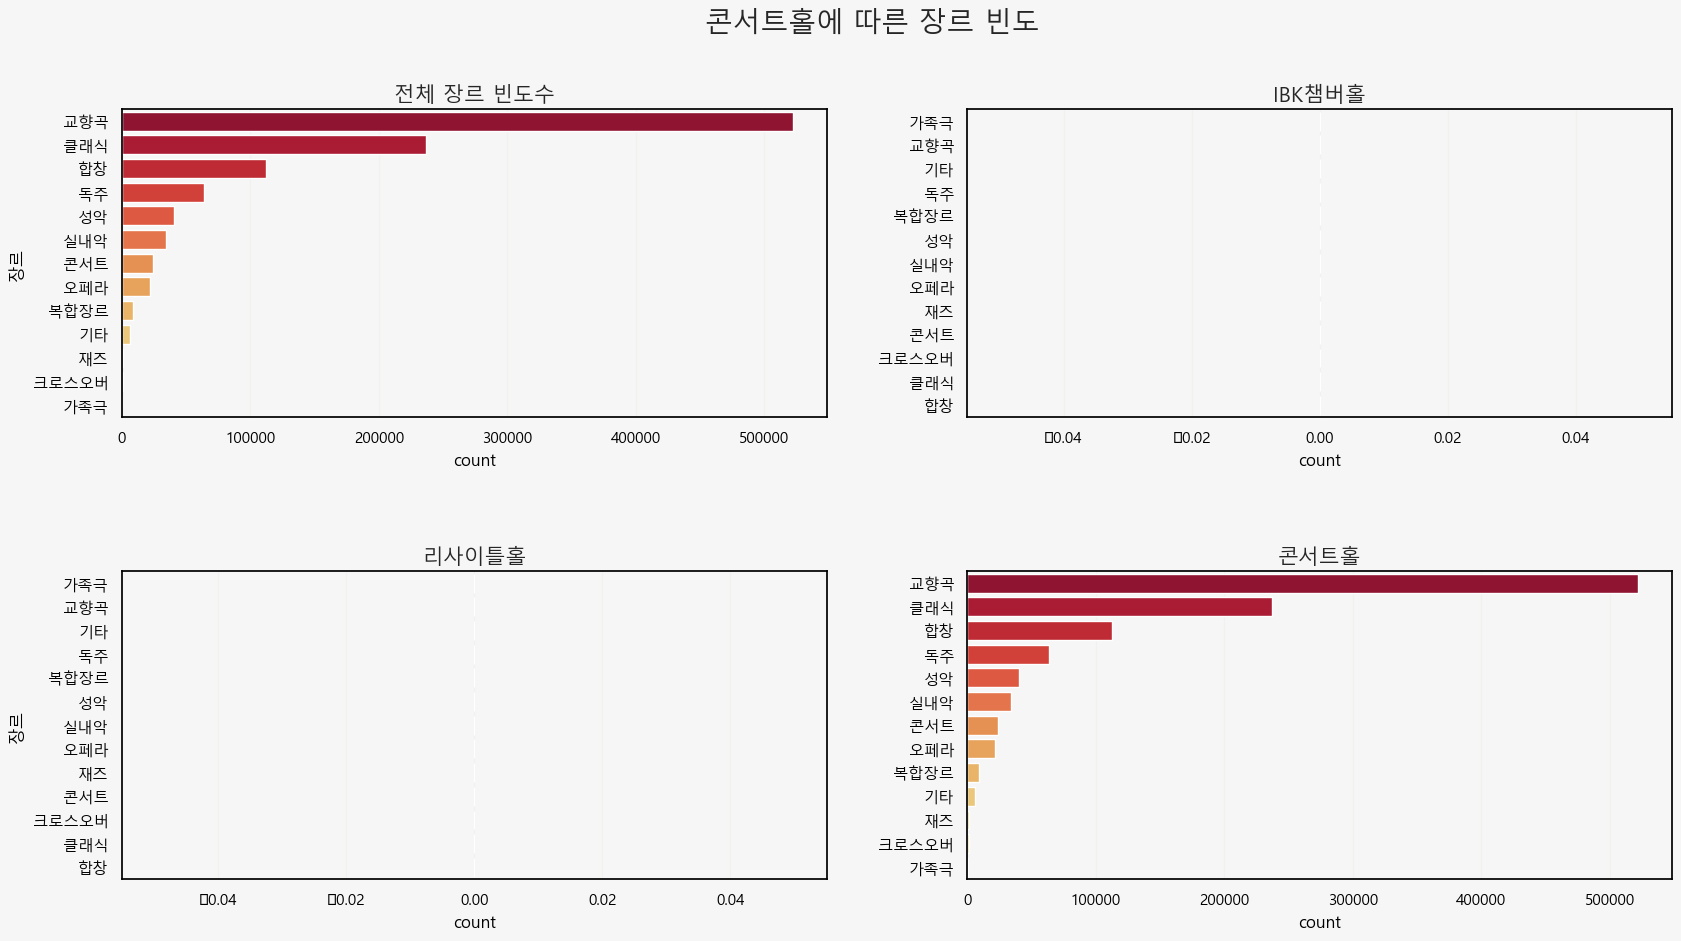

In [30]:
place = ['IBK챔버홀', '리사이틀홀','콘서트홀']

fig,ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20,10))
ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)


total_order = df['genre'].value_counts().index

sns.countplot(
    data  = df,
    y = 'genre',
    order  = total_order,
    palette = 'YlOrRd_r',
    ax = ax[0]
)

ax[0].set_title('전체 장르 빈도수', fontsize = 15)

for i,var in enumerate(place):
    
    cond = df['place'] == var
    
    order = df.loc[cond, 'genre'].value_counts().index
    
    
    sns.countplot(
        data = df[cond],
        y = 'genre',
        order = order,
        palette = 'YlOrRd_r',
        ax = ax[i + 1]
    )
    


    ax[i + 1].set_title(var, fontsize = 15)
    ax[i + 1].set_ylabel('')
    
ax[0].set_ylabel('장르')
ax[2].set_ylabel('장르')
    
fig.suptitle('콘서트홀에 따른 장르 빈도', fontsize = 20)

In [31]:
grouped = df.groupby(['place', 'genre']).agg({'age': 'count'}).reset_index()

place_counts = grouped.groupby('place')['age'].transform('sum')

grouped['proportion'] = grouped['age'] / place_counts

top_proportions = grouped.groupby('place').apply(lambda x: x.nlargest(3, 'proportion'))

top_proportions = top_proportions.rename(columns = {'age':'count'})

top_proportions

place genre   count  proportion
place                                   
콘서트홀  1   콘서트홀   교향곡  247426    0.522252
      11  콘서트홀   클래식  107505    0.226915
      3   콘서트홀    독주   55036    0.116167

<aside>
💡 Insight 

전체 장르 빈도수 중 가장 많았던 것은 교향곡, 독주, 실내악, 클래식 순이였습니다. 

IBK 챔버홀은 실내악, 독주, 클래식 순으로 많았습니다.
리사이틀홀은 독주, 실내악, 클래식 순으로 많았습니다.
콘서트홀은 교향곡, 클래식, 독주 순으로 많았습니다.

</aside>

# **좌석 별 평균 판매율**

<AxesSubplot:xlabel='공연연월', ylabel='age'>

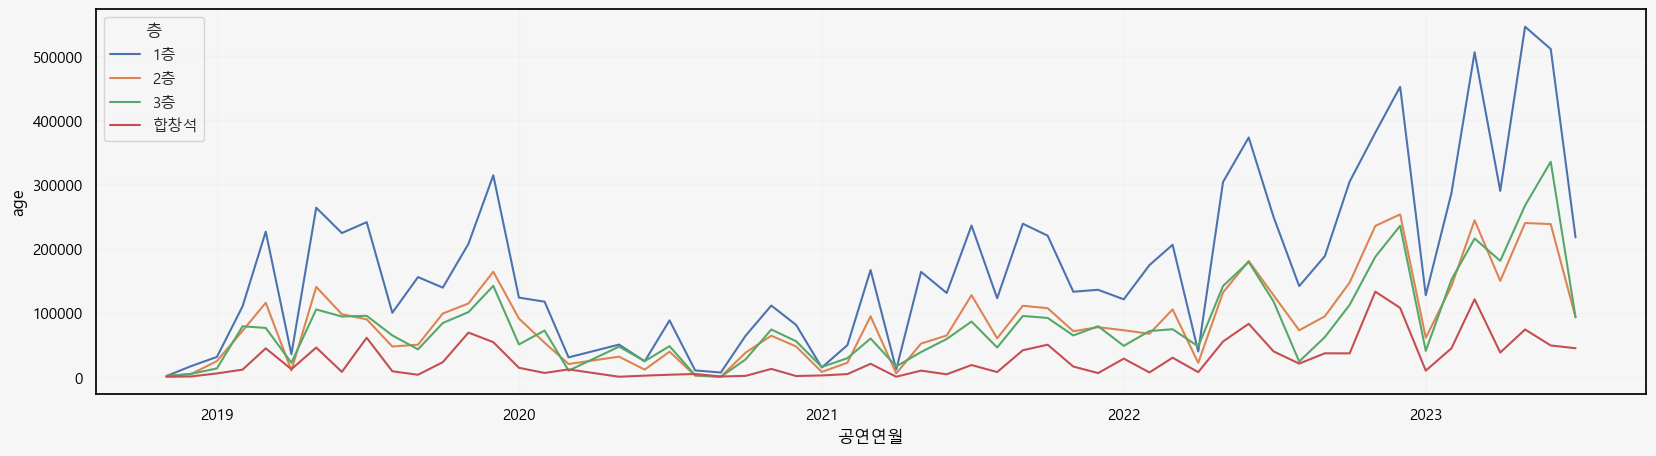

In [32]:
h = df.groupby(['공연연월','place','층']).agg({'age':'sum'}).reset_index().fillna(0)

fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = h,
    x = '공연연월',
    y = 'age',
    hue = '층',
    ci  = None
)

In [33]:
df.columns

Index(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'membership_type_6', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', 'price', 'ticket_cancel', 'discount_type',
       'performance_code', 'pre_open_date', 'open_date', 'genre', 'place',
       'running_time', 'intermission', 'member_yn', '공연연도', '공연월', '공연일',
       '공연연월', '층', '석', '세부좌석'],
      dtype='object')

# **빈 좌석들에 대한 데이터를 추가 시킬 것인지에 대한 아이디어**

결국 같은 날짜, 같은 공연 코드 별로 예매 되지 않은 빈 좌석들의 정보를 넣게 되면 결측치가 생길 수 있는 컬럼과 결측치가 생기지 않는 컬럼들이 있음

| 결측치가 생길 컬럼       | 결측치가 생기지 않을 컬럼      | 
|-------------|-----------|
| age,gender,membership_type,tran_date, tran_time     | play_date, play_st_time,seat   |
| price,member_yn     |open_date,genre,place,running_time,intermission,공연연도, 공연월, 공연일, 공연연월, 층, 석 , 세부좌석    |


# **프로토 타입 만들기**